In [19]:
import pandas as pd
import seaborn as sn

In [20]:
df=pd.read_excel(r"C:\Users\dell\Desktop\macine_operation\Bank_subscriber\src\Data\Banking_Call_Data.xlsx")

In [21]:
df.to_csv(r"C:\Users\dell\Desktop\macine_operation\Bank_subscriber\Data_kind_stack\main_data\raw_data.csv",index=False)

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [23]:
for i in df.columns:
    print(i)
    print()
    print(df[i].unique())
    print()

age

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

job

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital

['married' 'single' 'divorced']

education

['tertiary' 'secondary' 'unknown' 'primary']

default

['no' 'yes']

balance

[ 2143    29     2 ...  8205 14204 16353]

housing

['yes' 'no']

loan

['no' 'yes']

contact

['unknown' 'cellular' 'telephone']

day

[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]

month

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

duration

[ 261  151   76 ... 1298 1246 1556]

campaign

[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 3

In [24]:
encoders={}
from sklearn.preprocessing import LabelEncoder

for i in ["job","marital","education","default","housing","loan","contact","month","poutcome","y"]:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])
    encoders[i]=le

In [25]:
for col, encoder in encoders.items():
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(f"Mapping for {col}: {mapping}")

Mapping for job: {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
Mapping for marital: {'divorced': 0, 'married': 1, 'single': 2}
Mapping for education: {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}
Mapping for default: {'no': 0, 'yes': 1}
Mapping for housing: {'no': 0, 'yes': 1}
Mapping for loan: {'no': 0, 'yes': 1}
Mapping for contact: {'cellular': 0, 'telephone': 1, 'unknown': 2}
Mapping for month: {'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}
Mapping for poutcome: {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}
Mapping for y: {'no': 0, 'yes': 1}


In [26]:
jib=["job","marital","education","default","housing","loan","contact","month","poutcome","y"]


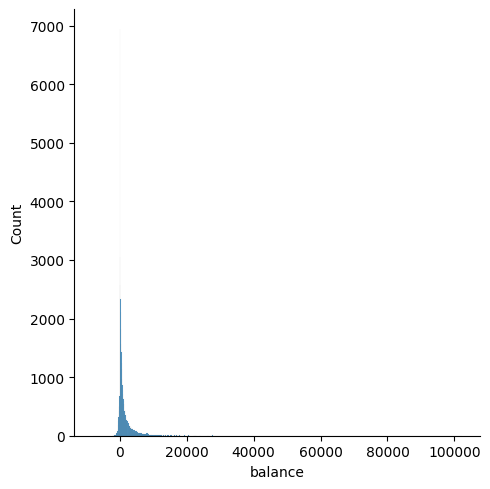

In [27]:
sn.displot(df['balance'])

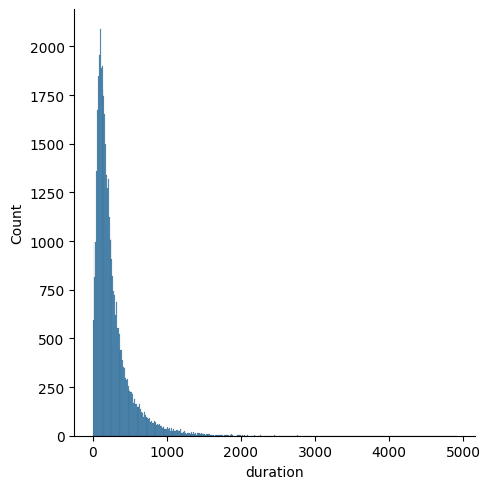

In [28]:
import seaborn as sn
sn.displot(df['duration'])

In [ ]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import joblib

transformer = PowerTransformer(method='yeo-johnson', standardize=True)
scalers = {}

for col in ["age", "balance", "duration"]:
    reshaped = df[[col]]  # Make it 2D
    df[col] = transformer.fit_transform(reshaped).ravel()
    scalers[col] = transformer
    

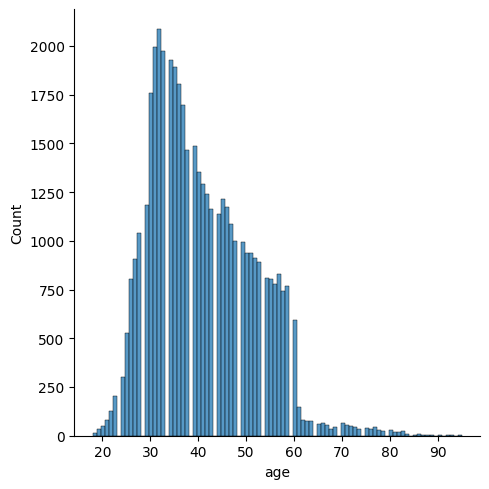

In [29]:
import seaborn as sn
sn.displot(df['age'])

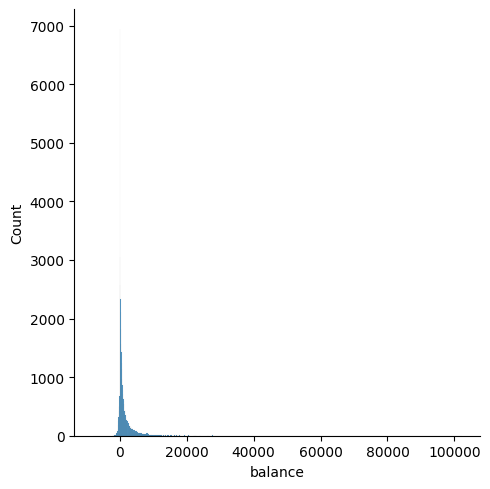

In [30]:
import seaborn as sn
sn.displot(df['balance'])

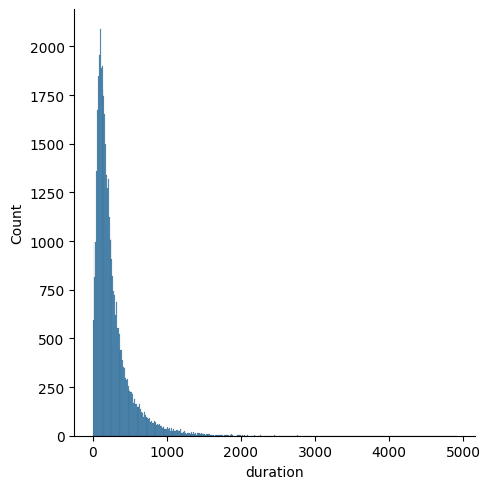

In [31]:
import seaborn as sn
sn.displot(df['duration'])

In [33]:
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64